In [ ]:
# Visualización de datos y gráficos
import matplotlib.pyplot as plt

# Computación numérica
import numpy as np

# Función para integración numérica
from scipy.integrate import solve_ivp

In [ ]:
K = 5.678e-12
T_inf = 298.15
t_rango = (0, 3600)
T0 = [400]  # Condición inicial como lista

p = (K, T_inf)

def EDOs(t, T, K, T_inf):
    dT = -K * (T**4 - T_inf**4)
    return dT

sol1 = solve_ivp(EDOs, t_rango, T0, method='RK23', args=p)
print(sol1)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.414e-01  3.756e+00  3.790e+01  3.793e+02
             8.362e+02  1.451e+03  2.296e+03  3.510e+03  3.600e+03]
        y: [[ 4.000e+02  4.000e+02  3.996e+02  3.963e+02  3.700e+02
              3.477e+02  3.296e+02  3.157e+02  3.059e+02  3.055e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 29
     njev: 0
      nlu: 0


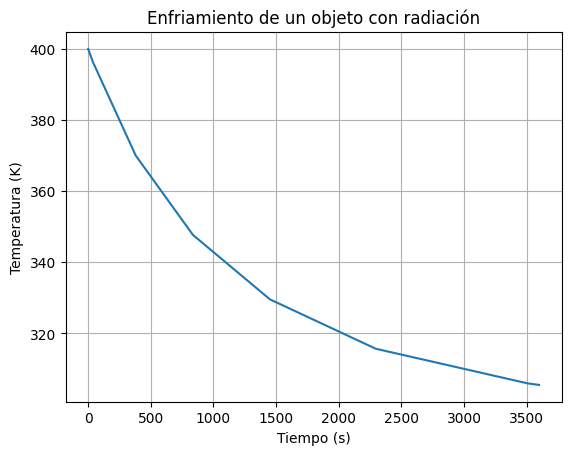

In [ ]:
plt.plot(sol1.t, sol1.y[0])
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (K)')
plt.title('Enfriamiento de un objeto con radiación')
plt.grid(True)
plt.show()

In [ ]:
T_final = sol1.y[0][-1]
print(f"Temperatura en t = 3600 segundos: {T_final} K")


Temperatura en t = 3600 segundos: 305.50480543962317 K


In [ ]:
k1=0.05
wa0=0.4
T0=298.15
y0 = [wa0, T0]
t_rango=(0, 150)

p = (k1, T0)

# Función describiendo cambio de altura del líquido y temperatura con respecto al tiempo
# Enfriemiento por convección y radiación
def EDOs(t,y,k1, T0):

    wa = y[0]
    T = y[1]


    dwa = -k1*(T/T0)*wa**2

    dT = k1*(1-np.exp(-wa))
    dy = [dwa, dT]


    return dy

sol1 = solve_ivp(EDOs, t_rango, y0, method='RK23', args=p)
print(sol1)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  8.916e-02  9.808e-01  9.897e+00  2.196e+01
             3.648e+01  5.394e+01  7.493e+01  1.002e+02  1.305e+02
             1.500e+02]
        y: [[ 4.000e-01  3.993e-01 ...  1.104e-01  9.963e-02]
            [ 2.981e+02  2.982e+02 ...  2.993e+02  2.994e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 32
     njev: 0
      nlu: 0


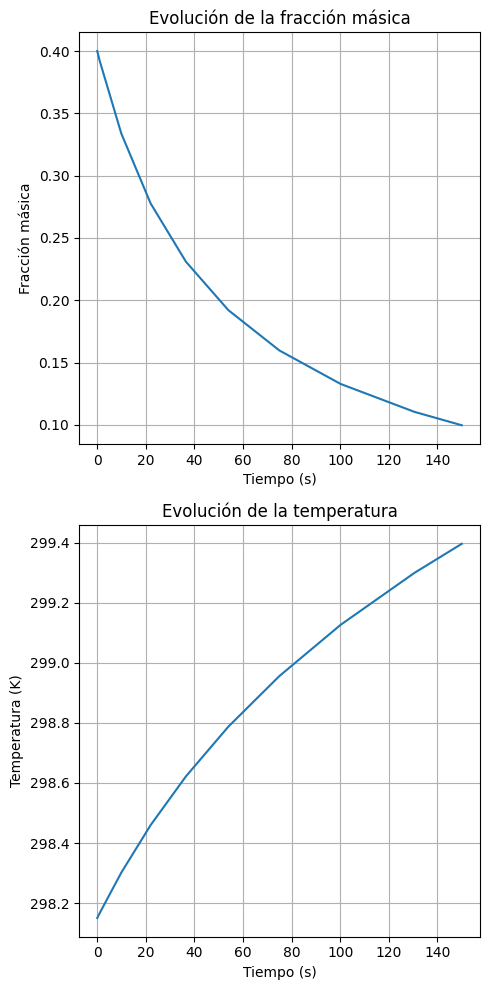

Fracción másica en t = 150 segundos: 0.0996309917821474 


In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(5, 10))

# Graficar la evolución de la fracción másica
ax[0].plot(sol1.t, sol1.y[0])
ax[0].set_xlabel('Tiempo (s)')
ax[0].set_ylabel('Fracción másica')
ax[0].set_title('Evolución de la fracción másica')
ax[0].grid(True)

# Graficar la evolución de la temperatura
ax[1].plot(sol1.t, sol1.y[1])
ax[1].set_xlabel('Tiempo (s)')
ax[1].set_ylabel('Temperatura (K)')
ax[1].set_title('Evolución de la temperatura')
ax[1].grid(True)

# Mostrar los gráficos
plt.tight_layout()
plt.show()
wa_final = sol1.y[0][-1]
print(f"Fracción másica en t = 150 segundos: {wa_final} ")

In [ ]:
from scipy.optimize import fsolve
import numpy as np

# Constantes
E = 400
R = 1000
K = 1.1
y5 = 0.03
x0 = 0.45
x5 = y5 / K

# Función objetivo para resolver el sistema no lineal
def equations(vars):
    x1, x2, x3, x4 = vars

    eq1 = 440 * x2 + 450 - 1440 * x1
    eq2 = 440 * x3 + 450 - 1440 * x2
    eq3 = 440 * x4 + 1000 * x1 - 1440 * x3
    eq4 = 440 * x5 + 1000 * x2 - 1440 * x4

    return [eq1, eq2, eq3, eq4]

# Solución inicial aproximada
initial_guess = [0.1, 0.1, 0.1, 0.1]

# Resolver el sistema de ecuaciones
solution = fsolve(equations, initial_guess)
x1, x2, x3, x4 = solution

# Calcular y1
y1 = K * x1

print(f"Fracción molar de soluto en el extracto que sale de la etapa 1, y(1) = {y1:.2f}")

Fracción molar de soluto en el extracto que sale de la etapa 1, y(1) = 0.49
